In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_csv('Data/combined_dataset.csv')

In [6]:
print("Basic Information:")
data.info()

print("\nSummary Statistics:")
print(data.describe(include='all'))

print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13503 entries, 0 to 13502
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   questions  13502 non-null  object
 1   solutions  13500 non-null  object
 2   answers    13351 non-null  object
dtypes: object(3)
memory usage: 316.6+ KB

Summary Statistics:
                                                questions  \
count                                               13502   
unique                                              13485   
top     Equilateral triangle $ABC$ has side length $84...   
freq                                                    2   

                                                solutions answers  
count                                               13500   13351  
unique                                              13485    4494  
top     Recall that the arithmetic mean of all the $n$...       2  
freq                                 


Question and Solution Length Statistics:
       question_length  solution_length
count     13503.000000     13503.000000
mean        210.462490       591.336370
std         208.005617       586.725346
min           0.000000         0.000000
25%          92.000000       252.000000
50%         153.000000       427.000000
75%         254.000000       730.000000
max        4309.000000     12710.000000


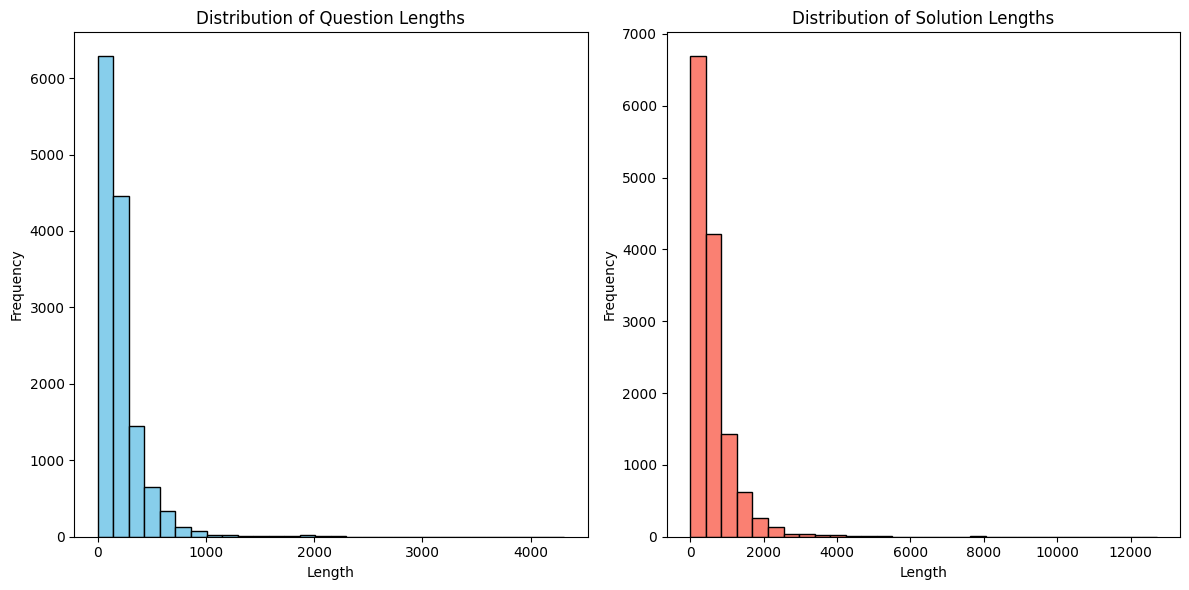

In [8]:
data['question_length'] = data['questions'].fillna("").apply(len)
data['solution_length'] = data['solutions'].fillna("").apply(lambda x: len(str(x)))

print("\nQuestion and Solution Length Statistics:")
print(data[['question_length', 'solution_length']].describe())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['question_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Question Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['solution_length'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Solution Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
question_text = ' '.join(data['questions'].dropna())
solution_text = ' '.join(data['solutions'].dropna())

wordcloud_questions = WordCloud(width=800, height=400, background_color='white').generate(question_text)
wordcloud_solutions = WordCloud(width=800, height=400, background_color='white').generate(solution_text)

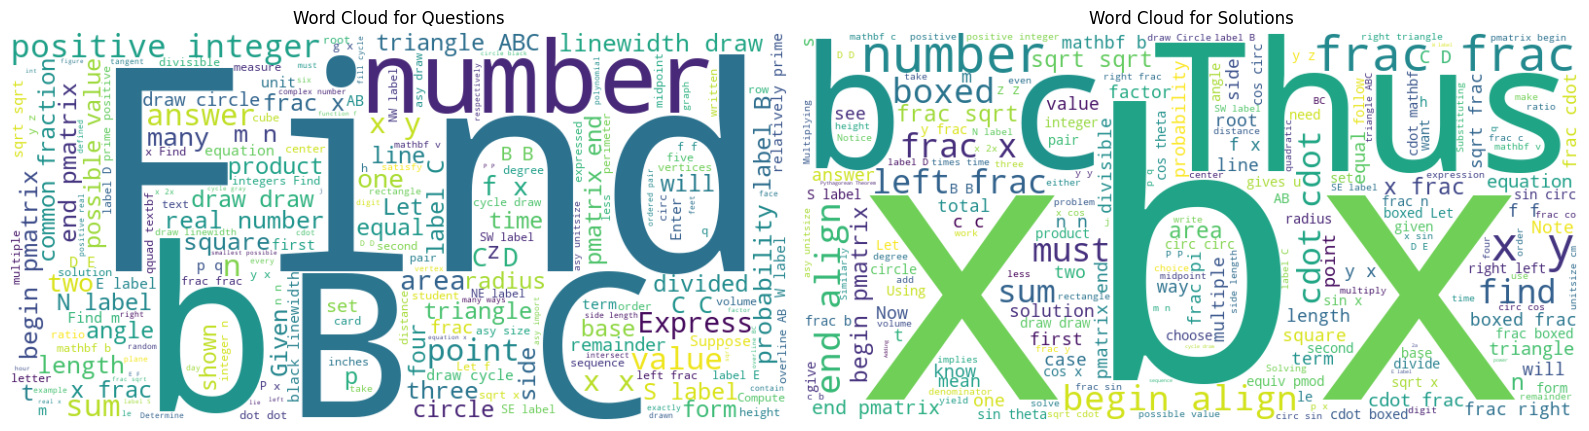

In [10]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_questions, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_solutions, interpolation='bilinear')
plt.title('Word Cloud for Solutions')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
missing_values = data.isnull().sum()
print(missing_values)

questions            1
solutions            3
answers            152
question_length      0
solution_length      0
dtype: int64


In [13]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 15


In [14]:
data_types = data.dtypes
print(data_types)
data['question_length'] = data['questions'].apply(lambda x: len(x) if isinstance(x, str) else 0)
data['answer_length'] = data['answers'].apply(lambda x: len(x) if isinstance(x, str) else 0)
summary_statistics = data[['question_length', 'answer_length']].describe()
print(summary_statistics)

questions          object
solutions          object
answers            object
question_length     int64
solution_length     int64
dtype: object
       question_length  answer_length
count     13503.000000   13503.000000
mean        210.462490       6.017255
std         208.005617       8.456836
min           0.000000       0.000000
25%          92.000000       2.000000
50%         153.000000       3.000000
75%         254.000000       8.000000
max        4309.000000     159.000000


In [15]:
data['questions'] = data['questions'].fillna('')
data['answers'] = data['answers'].fillna('')

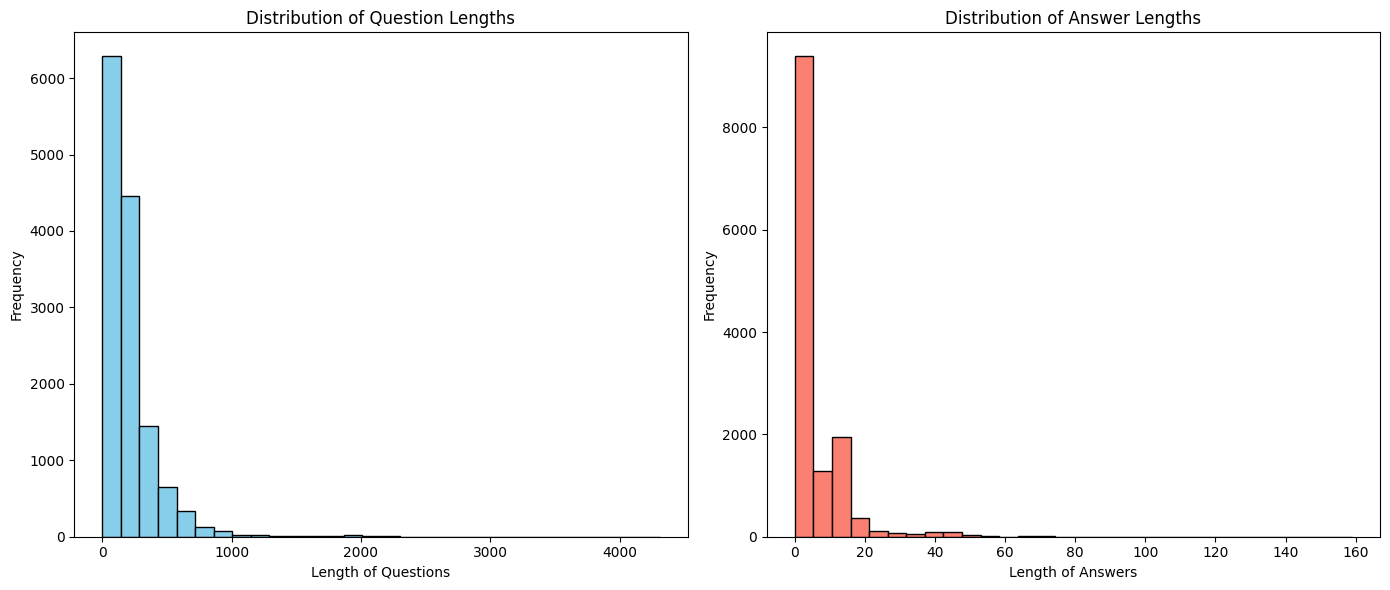

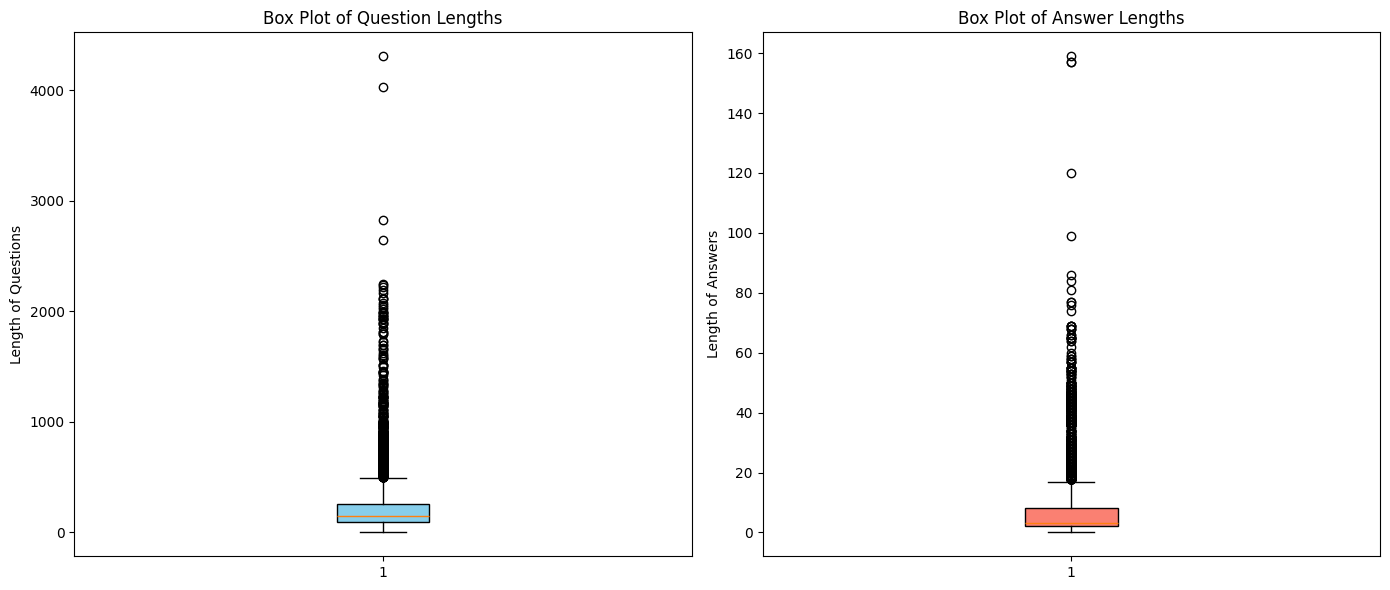

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['question_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['answer_length'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['question_length'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Question Lengths')
plt.ylabel('Length of Questions')

plt.subplot(1, 2, 2)
plt.boxplot(data['answer_length'], patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Box Plot of Answer Lengths')
plt.ylabel('Length of Answers')

plt.tight_layout()
plt.show()


In [17]:
print("EDA Summary:")
print(f"Missing Values:\n{missing_values}")
print(f"Duplicate Records: {duplicates}")
print(f"Data Types:\n{data_types}")
print(f"Summary Statistics:\n{summary_statistics}")


EDA Summary:
Missing Values:
questions            1
solutions            3
answers            152
question_length      0
solution_length      0
dtype: int64
Duplicate Records: 15
Data Types:
questions          object
solutions          object
answers            object
question_length     int64
solution_length     int64
dtype: object
Summary Statistics:
       question_length  answer_length
count     13503.000000   13503.000000
mean        210.462490       6.017255
std         208.005617       8.456836
min           0.000000       0.000000
25%          92.000000       2.000000
50%         153.000000       3.000000
75%         254.000000       8.000000
max        4309.000000     159.000000


In [18]:
from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'\$\S+\$', '', text)  
    text = re.sub(r'\W+', ' ', text)  
    text = text.lower()  
    return text

data['cleaned_questions'] = data['questions'].apply(preprocess_text)
data['cleaned_answers'] = data['answers'].apply(preprocess_text)

questions_word_freq = Counter(' '.join(data['cleaned_questions']).split())
answers_word_freq = Counter(' '.join(data['cleaned_answers']).split())

common_words_questions = questions_word_freq.most_common(20)
print("Most Common Words in Questions:", common_words_questions)

common_words_answers = answers_word_freq.most_common(20)
print("Most Common Words in Answers:", common_words_answers)


Most Common Words in Questions: [('the', 29850), ('of', 18757), ('0', 13822), ('a', 13671), ('is', 12619), ('1', 11297), ('and', 11142), ('2', 11033), ('3', 7109), ('x', 6422), ('5', 6398), ('in', 5919), ('what', 5157), ('that', 4964), ('label', 4757), ('draw', 4711), ('4', 4639), ('are', 4546), ('b', 4391), ('find', 4238)]
Most Common Words in Answers: [('frac', 2042), ('2', 1761), ('3', 1430), ('1', 1395), ('4', 943), ('5', 939), ('sqrt', 650), ('6', 591), ('0', 507), ('8', 504), ('7', 502), ('9', 405), ('10', 358), ('pmatrix', 344), ('12', 339), ('pi', 287), ('text', 250), ('11', 249), ('13', 229), ('circ', 221)]


In [19]:

from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

bigrams_questions = get_ngrams(data['cleaned_questions'], 2)[:20]
trigrams_questions = get_ngrams(data['cleaned_questions'], 3)[:20]

bigrams_answers = get_ngrams(data['cleaned_answers'], 2)[:20]
trigrams_answers = get_ngrams(data['cleaned_answers'], 3)[:20]

print("\nMost Common Bigrams in Questions:")
for bigram, freq in bigrams_questions:
    print(f"{bigram}: {freq}")

print("\nMost Common Trigrams in Questions:")
for trigram, freq in trigrams_questions:
    print(f"{trigram}: {freq}")

print("\nMost Common Bigrams in Answers:")
for bigram, freq in bigrams_answers:
    print(f"{bigram}: {freq}")

print("\nMost Common Trigrams in Answers:")
for trigram, freq in trigrams_answers:
    print(f"{trigram}: {freq}")



Most Common Bigrams in Questions:
of the: 5768
is the: 4667
what is: 4645
find the: 2238
how many: 1982
in the: 1977
value of: 1767
such that: 1523
and are: 1361
label label: 1335
your answer: 1254
the sum: 1125
number of: 1086
let be: 1082
sum of: 1075
to the: 1054
express your: 1051
positive integers: 1033
the value: 978
the number: 933

Most Common Trigrams in Questions:
what is the: 4013
express your answer: 1049
the sum of: 1028
the value of: 952
the area of: 764
your answer as: 724
the number of: 714
label label label: 697
is the value: 675
where and are: 671
let be the: 631
sum of the: 607
the probability that: 585
begin pmatrix end: 571
pmatrix end pmatrix: 571
as common fraction: 481
is the probability: 469
answer as common: 430
area of the: 427
your answer in: 425

Most Common Bigrams in Answers:
begin pmatrix: 172
end pmatrix: 172
frac sqrt: 155
left frac: 111
pmatrix end: 98
frac pi: 94
frac frac: 91
frac 11: 74
frac 10: 51
frac 16: 49
frac right: 49
frac 12: 47
frac 13: 4

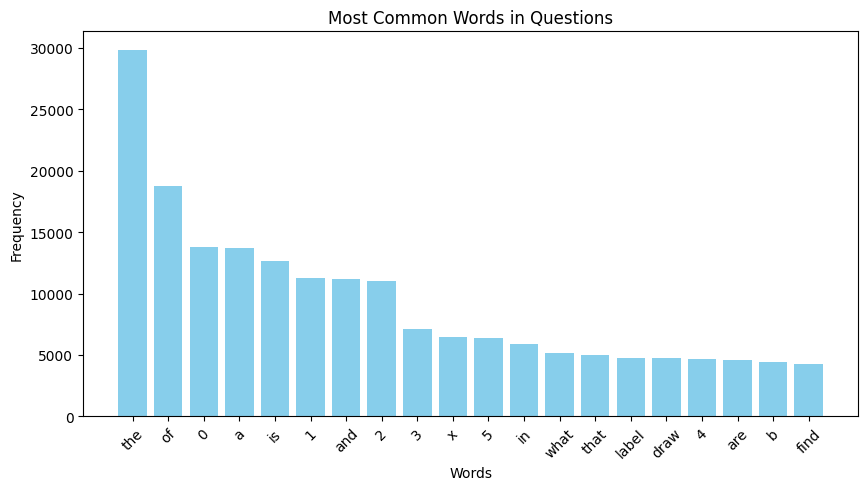

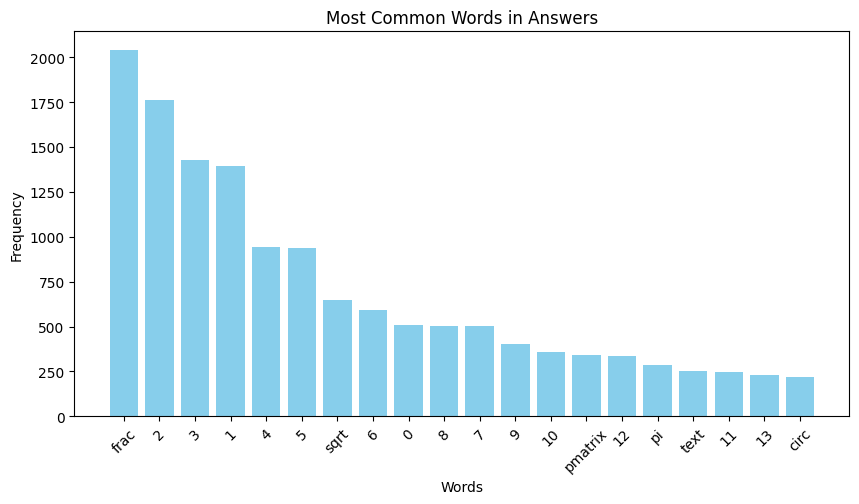


Most Common Bigrams in Questions:
of the: 5768
is the: 4667
what is: 4645
find the: 2238
how many: 1982
in the: 1977
value of: 1767
such that: 1523
and are: 1361
label label: 1335
your answer: 1254
the sum: 1125
number of: 1086
let be: 1082
sum of: 1075
to the: 1054
express your: 1051
positive integers: 1033
the value: 978
the number: 933

Most Common Trigrams in Questions:
what is the: 4013
express your answer: 1049
the sum of: 1028
the value of: 952
the area of: 764
your answer as: 724
the number of: 714
label label label: 697
is the value: 675
where and are: 671
let be the: 631
sum of the: 607
the probability that: 585
begin pmatrix end: 571
pmatrix end pmatrix: 571
as common fraction: 481
is the probability: 469
answer as common: 430
area of the: 427
your answer in: 425

Most Common Bigrams in Answers:
begin pmatrix: 172
end pmatrix: 172
frac sqrt: 155
left frac: 111
pmatrix end: 98
frac pi: 94
frac frac: 91
frac 11: 74
frac 10: 51
frac 16: 49
frac right: 49
frac 12: 47
frac 13: 4

In [21]:
# Import necessary libraries
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def preprocess_text(text):
    text = re.sub(r'\$\S+\$', '', text)  
    text = re.sub(r'\W+', ' ', text)  
    text = text.lower()  
    return text

data['cleaned_questions'] = data['questions'].apply(preprocess_text)
data['cleaned_answers'] = data['answers'].apply(preprocess_text)

questions_word_freq = Counter(' '.join(data['cleaned_questions']).split())
answers_word_freq = Counter(' '.join(data['cleaned_answers']).split())

common_words_questions = questions_word_freq.most_common(20)
common_words_answers = answers_word_freq.most_common(20)

def plot_word_freq(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


plot_word_freq(common_words_questions, 'Most Common Words in Questions')
plot_word_freq(common_words_answers, 'Most Common Words in Answers')

def get_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

bigrams_questions = get_ngrams(data['cleaned_questions'], 2)[:20]
trigrams_questions = get_ngrams(data['cleaned_questions'], 3)[:20]

bigrams_answers = get_ngrams(data['cleaned_answers'], 2)[:20]
trigrams_answers = get_ngrams(data['cleaned_answers'], 3)[:20]

print("\nMost Common Bigrams in Questions:")
for bigram, freq in bigrams_questions:
    print(f"{bigram}: {freq}")

print("\nMost Common Trigrams in Questions:")
for trigram, freq in trigrams_questions:
    print(f"{trigram}: {freq}")

print("\nMost Common Bigrams in Answers:")
for bigram, freq in bigrams_answers:
    print(f"{bigram}: {freq}")

print("\nMost Common Trigrams in Answers:")
for trigram, freq in trigrams_answers:
    print(f"{trigram}: {freq}")

